### • Business Understanding

•  **Introduction:** The aim of this project is to develop a binary classifier model that can predict which customers are likely to buy a new vehicle. To achieve this, a dataset of car repurchases will be used for this binary classification problem. While undertaking tasks such as data exploration, cleaning, feature scaling, selection of appropriate algorithm, its hyperparameters and employing various techniques such as cross-validation, hyperparameter tuning, feature importance etc. can lead to an improvement in the accuracy of the model. The outcomes of this model can subsequently be utilized to focus on potential customers for a promotional marketing campaign.

• **Dataset:** The below dataset contains information about current customers who have bought one or more vehicle.
		
             repurchase_training.csv

• **Business Problem:** Develop a Binary Classifier model that can predict customers who are likely towards purchasing a new vehicle, by working on a dataset of car repurchases using Binary Classification techniques and algorithm.

The following activitives are performed for this analysis using Binary Classification.

• Business Understanding

• Data Understanding

        1] Loading Data
        2] Exploring Data

• Data Preparation

        3] Transforming Categorical Data into Numerical
        4] Selecting Target Variable and Features
        5] Splitting Data into Different (Training, Validation and Testing) Sets
        6] Features Scaling

• Modeling

        7] Assessing Baseline Performance
        8] Training Binary Classification Model

• Model Evaluation

        9] Analysing Model Performance
    
• Summary Insight & Deployment Suggestion

In [632]:
# Importing required Python libraries
import numpy as np
import pandas as pd

# Importing SKLearn libaries - Logistic Regression Model and other related modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Importing required Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing other formatting libraries
from quo import echo
import warnings

In [633]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings("ignore")

### • Data Understanding

#### 1] Loading  Data

In [634]:
# Generating a variable called file_url, which will store the path detail for the CSV data file. 
# Note: To load the data successfully, update this path to the correct location of the file.
file_url = '/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment2/'

# Loading data into a pandas dataframe and assigning the name 'df_car_repurchase_data' to it. 
df_car_repurchase_data = pd.read_csv(file_url + 'repurchase_training.csv')

#### 2] Exploring Data

• Inspecting a few individual data points of the dataset.

In [635]:
# Showing the initial 5 rows of the dataset.
df_car_repurchase_data.head(5)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


#### Insights: 

* Reviewing the initial obeservations, the car repurchase dataset contains multiple fields that provide information related to the model of the vehicle, the vehicle's category, the annual mileage, the age of the previous vehicle, various details regarding servicings, as well as the gender and age range of the car owners.

* Out of all the features in the dataset, four of them contain categorical data, which are 'age_band', 'gender', 'car_model', and 'car_segment', while rest of the features hold numerical data. 

* The 'ID' attribute seems to be a variable for identification purposes.

* The 'Target' attribute is the variable we want to predict, indicating a value of 0 if the individual bought only single vehicle and 1 if the customer purchased multiple vehicles.

•	Examining the dimension of the datasets.

In [636]:
# Providing information about the size or shape of the dataset by describing the number of rows and columns or its shape.# 
print(df_car_repurchase_data.shape)
print("\nThus, the dataset consist of:")
print("Rows: {}".format(df_car_repurchase_data.shape[0]))
print("Columns: {}".format(df_car_repurchase_data.shape[1]))

(131337, 17)

Thus, the dataset consist of:
Rows: 131337
Columns: 17


•	Displaying features names. 

In [637]:
# Viewing the features of the dataset.
df_car_repurchase_data.columns

Index(['ID', 'Target', 'age_band', 'gender', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased'],
      dtype='object')

#### Insight: 

* The dataset consists of approximately 131 thousand observations and 17 distinct characteristics that contain various information related to customers who have purchased either single or multiple vehicles. The above outcome illustrates the names of the 17 features.

•	Providing a summary overview of the dataset.

In [638]:
# Providing an overview of the key statistical details or summary statistics of the dataset.
# Inspecting the summary information of the attributes of the dataset.
df_car_repurchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

#### Insights: 
* The above summary information informs that the vehicles repurchase dataset consists of two distinct categories of information - textual or string data that is represented as an object, and numerical or integer data that is represented as int64. 

* Most of the data for the 'age_band' and 'gender' attributes is missing. However, there are no missing records for the rest of the features.

* Regarding the 'age_band' feature, only 18962 instances out of 131337 are available, indicating that about 85% of the total data is missing.

* With regards to the 'gender' attribute, there are only 62029 observations out of the total 131337, indicating that nearly 52% of the overall data is missing.

•	Checking summary statistics of the dataset.

In [639]:
# Checking the statistical information of integer variables of the dataset.
df_car_repurchase_data.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [640]:
# Checking statistical summary information for all variables of the dataset across different data types.
df_car_repurchase_data.describe(include='all')

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,18962,62029,131337,131337,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
unique,NaN,NaN,7,2,19,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,4. 45 to 54,Male,model_2,Small/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4058,36072,34491,54553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,77097.384180,0.026809,NaN,NaN,NaN,NaN,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,NaN,NaN,NaN,NaN,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### Insight: 

* The 'ID' attribute seems to be an identifier and its values are not arranged in specific chronological order as the highest value is 154139, while the dataset contains 131337 datapoints.

• Inspecting for any null values in the dataset.

In [641]:
# Checking whether there are any null values in the dataset.
df_car_repurchase_data.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

#### Insight: 

* As mentioned previously, most of the data related to 'age_band' and 'gender' variables is not available, as indicated by the results of checking for null (above outcome) and missing values (below outcome and chart).

• Checking if any missing values in the dataset.

In [642]:
# Verifying whether there are any missing values in the dataset.
df_car_repurchase_data.isna().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

<Figure size 1000x600 with 0 Axes>

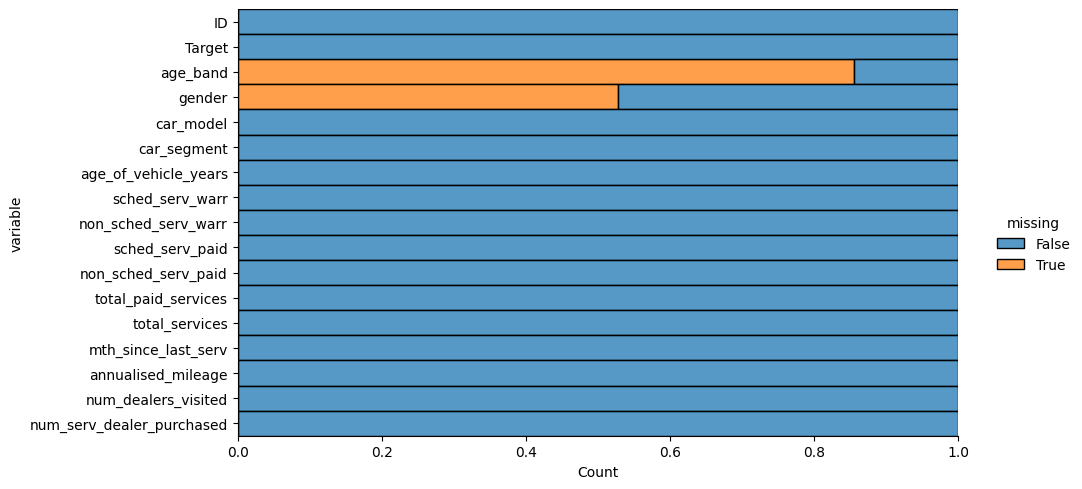

In [643]:
# Creating a chart to display missing values in the dataset.
# Graph settings.
plt.figure(figsize=(10,6))

# Displaying missing values in the dataset.
sns.displot(data=df_car_repurchase_data.isna().melt(value_name="missing"),
            y="variable",
            aspect=2,
            hue="missing",
            multiple="fill")

#### Insight: 

* The above chart indicates that around 85% of values for the 'age_band' variable and over 50% of values for the 'gender' variable are missing.

• Examining if any duplicate values in the dataset.

In [644]:
# Checking whether there are any duplicate values in the dataset.
df_car_repurchase_data.duplicated().sum()

0

#### Insight: 

* The vehicles repurchase dataset does not contain any duplicate values, indicating that each observation is independent.

• Checking the data distribution of the numerical features. 

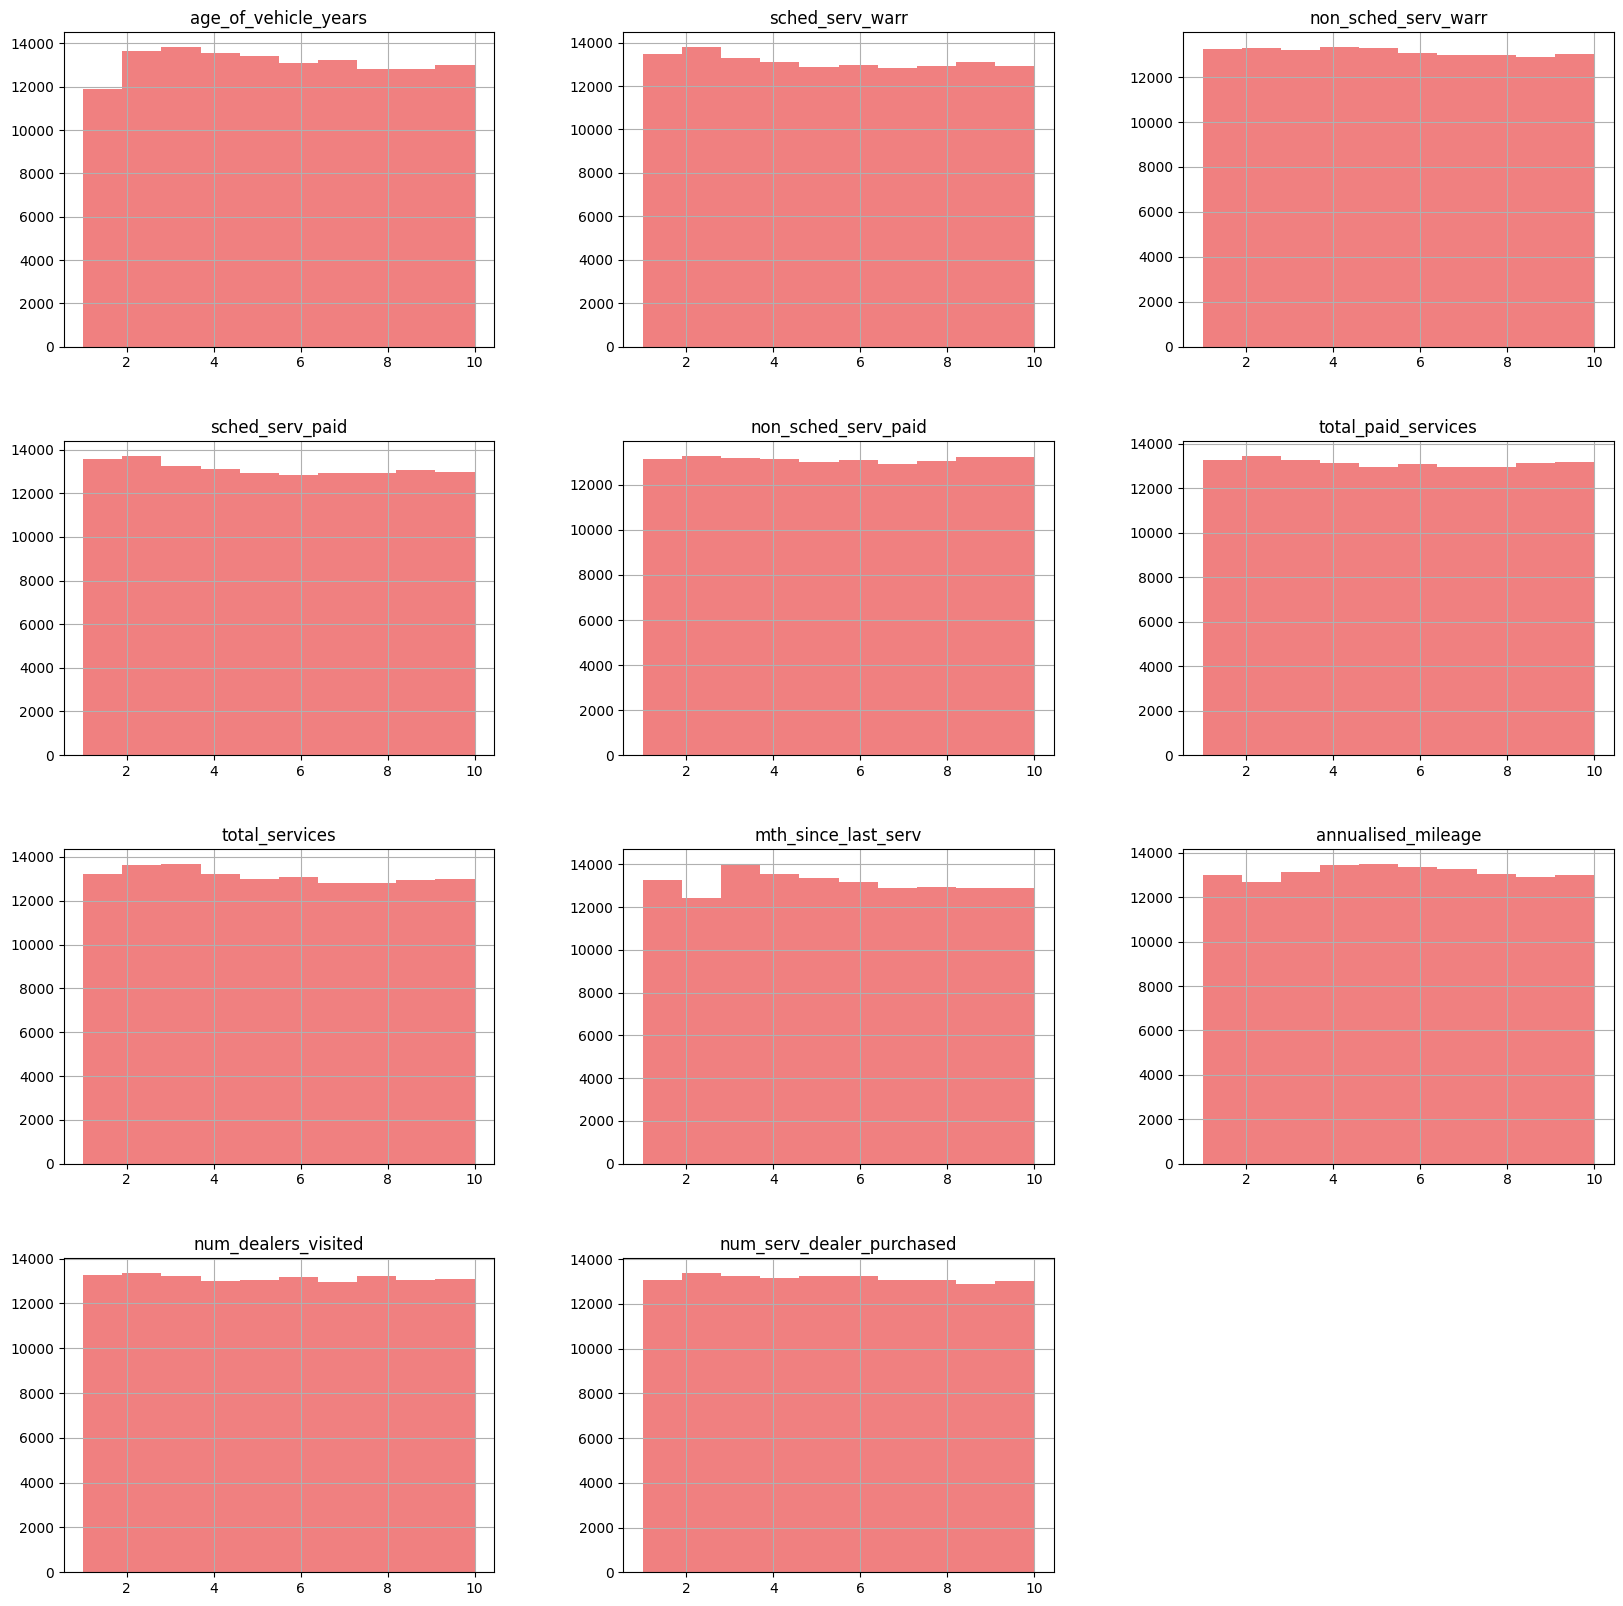

In [645]:
# Selecting the numerical attributes from the dataset to analyse distribution of their values.
df_continuous_features = df_car_repurchase_data[['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid', 
                                                 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 
                                                 'num_serv_dealer_purchased']]

# Generating a graphical representation of the data distribution of the numerical variables using a histogram.
histogram = df_continuous_features.hist(figsize=(20,20), color='lightcoral')

#### Insight: 

* As indicated in the above histogram plots, the data is divided into roughly ten equal parts by representing the numerical features values in deciles.

* From this data exploration and analysis, it is evident that the data especially from categorical features is not ready for building machine learning binary classification model, and it requires preprocessing and preparation before it can be utilized by the algorithm.

### • Data Preparation

• Checking the distinct values of the specific feature.

In [646]:
# Creating function to check the distinct values of the specific feature. 
def distinct_feature_values(feature_name):
    print("Feature Name:", feature_name)
    print("It's Distinct Values:", df_car_repurchase_data[feature_name].unique())

In [647]:
# Calling distinct_feature_values() function to check the distinct values of the 'age_band' feature. 
distinct_feature_values('age_band')

Feature Name: age_band
It's Distinct Values: ['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']


In [648]:
# Calling distinct_feature_values() function to check the distinct values of the 'age_band' feature. 
distinct_feature_values('gender')

Feature Name: gender
It's Distinct Values: ['Male' nan 'Female']


• Handling missing values in the features.

#### Rationale: 

<u> Misssing Values </u>
* As machine learning algorithms are incapable of processing features with missing values, we have two options to address these missing values.

     1] We can replace missing values with the relavant vaule: Using the most frequent occurring (mode) value from the feature to replace missing values in categorical variables may not accurately represent the distribution of data in those variables 'age_band' and 'gender', especially when large portion of the data is missing. This approach could also create an imbalance in the data by introducing a high number of imputed mode values, potentially leading to biased results.

     2] We can eliminate the columns containing missing values entirely: It would be suitable to remove these two 'age_band' and 'gender' features since replacing any value would significantly distort the data due to the high percentage of missing values in these variables.

<u> Identifier </u>
* The 'ID' variable do not have any predictive value as it contains a unique value for each observation, which means that its values do not contribute to any patterns or trends in the data. And including them in the analysis can lead to overfitting straight a way, where model would fit this specific values from the feature rather than the underlying generic patterns in the data.

Therefore, removing 'ID', 'age_band' and 'gender' features from the vehicle repurchase dataset.

In [649]:
# Removing 'ID', 'age_band', and 'gender' features from the dataset. 
df_car_repurchase_data.drop(['ID', 'age_band', 'gender'], axis=1, inplace=True) 

<Figure size 1000x600 with 0 Axes>

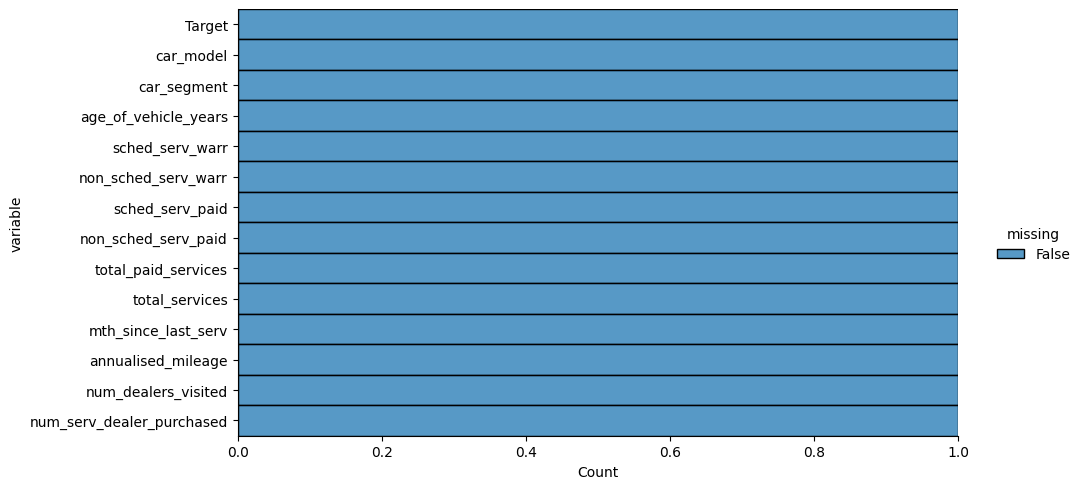

In [650]:
# Creating a chart to verify elimination of ID and missing value features in the dataset.
# Graph settings.
plt.figure(figsize=(10,6))

# Displaying chart to ensure no missing values in the dataset.
sns.displot(data=df_car_repurchase_data.isna().melt(value_name="missing"),
            y="variable",
            aspect=2,
            hue="missing",
            multiple="fill")

• Checking the distinct values of the specific feature.

In [651]:
# Calling distinct_feature_values() function to check the distinct values of the 'car_model' feature. 
distinct_feature_values('car_model')

Feature Name: car_model
It's Distinct Values: ['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']


In [652]:
# Calling distinct_feature_values() function to check the distinct values of the 'car_segment' feature. 
distinct_feature_values('car_segment')

Feature Name: car_segment
It's Distinct Values: ['LCV' 'Small/Medium' 'Large/SUV' 'Other']


#### Insight: 

* The above results indicate that the dataset comprises of 19 distinct car models stored in 'car_model' attribute, belonging to 4 different segments registered in the 'car_segment' feature.

#### Rationale: 

<u> Categorical Data Transformation </u>
* As categorical data from above two 'car_model', 'car_segment' features cannot be directly used in binary classification algorithms for machine learning because these algorithms are based and operate on mathematical equations that require numerical inputs. 

* Additionally, these features 'car_model' and 'car_segment' hold significant information regarding the model and category of vehicles that customers have purchased. This information can be used to predict whether the customer is inclined to purchase a new vehicle.

<u> One-Hot Encoding </u>
* Therefore, it is necessary to convert the categorical data of these features into numerical data. To achieve this, employing one-hot encoding method, which creates binary columns for every distinct category in the feature. 

* This method is preferred as there is no inherent order among the category values of the feature, and do not want to create any random relationships between them and prevent model from assuming natural ordering among these distinct categories that may suffer from model bias. 

#### 3] Transforming Categorical Data into Numerical

In [653]:
# Creating a copy of the original dataset.
df_cleaned = df_car_repurchase_data.copy()

In [654]:
# Instantiating object of the OneHotEncoder class.
ohe = OneHotEncoder(sparse=False)

# Creating the list of categorical features.
categorical_features = ['car_model', 'car_segment']

# Employing the OneHotEncoder object's fit_transform() function to transform categorical data into numerical.
encoded_data_array = ohe.fit_transform(df_cleaned.loc[:, categorical_features])

# Generating the dataframe of the transformed numerical data.
df_encoded = pd.DataFrame(encoded_data_array, columns=ohe.get_feature_names_out())

# Combining numerical dataframe with the original dataset.
df_car_repurchase_encoded = pd.concat([df_cleaned, df_encoded], axis=1)

In [655]:
# Displaying initial records of the dataset. 
df_car_repurchase_encoded.head()

,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,model_1,LCV,9,2,10,3,7,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,model_2,Small/Medium,6,10,3,10,4,9,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,model_3,Large/SUV,9,10,9,10,9,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,model_3,Large/SUV,5,8,5,8,4,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,model_2,Small/Medium,8,9,4,10,7,9,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [656]:
# Removing the categorical features from the dataset as they are transformed to numerical data.
df_car_repurchase_encoded.drop(labels=categorical_features, axis=1, inplace=True)

In [657]:
# Checking the features after transforming and removing categorical features from the dataset.
df_car_repurchase_encoded.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

#### Insight: 

* Following the transformation of categorical data, the above results indicate that new features have been generated for each distinct class.

#### 4] Selecting Target Variable and Features

In [658]:
# Extracting the target variable 'Target' into y variable.
y = df_car_repurchase_encoded.pop('Target')

# Creating 'X' variable with all the features.
X = df_car_repurchase_encoded

• Checking the quantity and rate of occurence of each class within the target variable.

In [659]:
# Examining the quantity of each class of the target variable.
y.value_counts()

0    127816
1      3521
Name: Target, dtype: int64

In [660]:
# Examining the rate of occurence of each class of the target variable.
y.value_counts(normalize=True)

0    0.973191
1    0.026809
Name: Target, dtype: float64

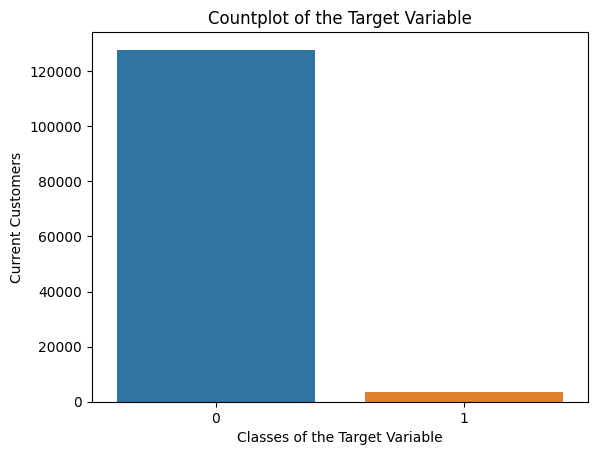

In [661]:
# Visualising distribution of data of target variable.
sns.countplot(x=y)

# Adding labels to the chart.
plt.title('Countplot of the Target Variable')
plt.xlabel('Classes of the Target Variable')
plt.ylabel('Current Customers')
plt.show()

#### Insight: 

* Based on the above results, it is evident that a big proportion of the total observations belong to one of the target class, specifically customers who have bought a single vehicle, as indicated by the value 0. Therefore, the dataset of car repurchases is highly imbalanced.

#### Rationale: 

<u> Validation Set </u>
*  Creating a validation set provides adaptability to carry out multiple experiments, and allows the comparison of the model's performance on the training set and the validation set to determine if the model is overfitting or underfitting. 

* Furthermore, using a validation set, we can adjust model's hyperparameters and retrain the model until it performs well on the validation set. After we have optimized the model's performance on the validation set, we can then apply the model on the test set to assess its ability to generalize to new and unseen data.

* Therefore, utilizing train_test_split() function from sklearn.model_selection module of sklearn library, the car repurchase dataset is split into training (60%), validation (20%), and testing (20%) sets to leverage the flexibility of multiple experimentation.  

* Additionally, for any (binary) classification problem, it is essential to examine the frequencies/rates of every class within the target variable and ensure that the splitting of data into different sets matches as similar to the actual data spread.  

* As the car repurchase dataset is highly imbalanced, it is necessary to obtain as similar distribution of distinct classes of the target variable for all of the different sets as original dataset.

#### 5] Splitting Data into Different Sets

In [662]:
#Splitting the target variable and features into data with 80% and test with 20%.
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#Splitting the target variable and features into training with 80% and validation with 20%.
X_train, X_validation, y_train, y_validation = train_test_split(X_data, y_data, test_size=0.2, random_state=9)

• Examining the frequencies rates of every class within the target variable of the Training set. 

In [663]:
# Examining the quantity of each class of the target variable.
y_train.value_counts()

0    81849
1     2206
Name: Target, dtype: int64

In [664]:
# Examining the rate of occurence of each class of the target variable.
y_train.value_counts(normalize=True)

0    0.973755
1    0.026245
Name: Target, dtype: float64

• Examining the frequencies rates of every class within the target variable of the Validation set. 

In [665]:
# Examining the quantity of each class of the target variable.
y_validation.value_counts()

0    20450
1      564
Name: Target, dtype: int64

In [666]:
# Examining the rate of occurence of each class of the target variable.
y_validation.value_counts(normalize=True)

0    0.973161
1    0.026839
Name: Target, dtype: float64

• Examining the frequencies rates of every class within the target variable of the Testing set. 

In [667]:
# Examining the quantity of each class of the target variable.
y_test.value_counts()

0    25517
1      751
Name: Target, dtype: int64

In [668]:
# Examining the rate of occurence of each class of the target variable.
y_test.value_counts(normalize=True)

0    0.97141
1    0.02859
Name: Target, dtype: float64

#### Insight: 

* As the dataset is imbalanced, the almost similar distribution pattern of every class is evident across the target variable of the three sets for training, validation, and testing as actual dataset.

* After the splitting process, following are the frequencies of the target variable classes.

  - Actual Data: Class 1 -> 0.97 and Class 0 -> 0.026

  - Training set: Class 1 -> 0.97 and Class 0 -> 0.026

  - Validation set: Class 1 -> 0.97 and Class 0 -> 0.026

  - Testing set: Class 1 -> 0.97 and Class 0 -> 0.028

#### Rationale: 

<u> Scaling Features Data </u>
* Machine learning algorithms often use some form of distance calculation to determine the relationship between different features in the dataset. If the features are on different scales, the algorithm may prioritize some high value range features over others which may have more significant information, leading to biased results.

* In addition, the values for the numerical features are divided into ten deciles, ranging from 1 to 10, while categorical data that has been converted into numerical features, consist of either 0 or 1.

* Therefore, performing scaling for all the features so that all the features values are at same level and that the algorithm can use all the information from the dataset features to learn generalised patterns, identify buying behaviour and make accurate predictions.

<u> StandardScaler </u>
* Employing StandardScaler class which is imported from sklearn.preprocessing module to scale and bring all features values at same level. Choosing this method because it does not change the shape of the data distribution and preserves outliers as it scales the data based on the mean of 0 and standard deviation of 1, of the entire dataset, rather than individual datapoints. 

#### 6] Features Scaling

In [669]:
# Instantiating the object named 'scaler' of the StandardScaler class imported from the sklearn.preprocessing module.
scaler = StandardScaler()

# Fitting the 'scaler' to the training data. 
scaler.fit(X_train)

# Transforming the features data from all the sets using 'scaler' and replacing the features data with the results of the 'scaler'.
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

### • Modeling

#### Rationale: 

<u> Binary Classification Algorithm </u>
*  The target variable consists of either 0 or 1, where 0 represents the purchase of a single vehicle by the customer, while 1 represents the purchase of multiple vehicles. As we aim to predict only these two possible classes outcome, the Binary Classification model is the right choice along with learning objective purpose.

<u> Baseline Performance </u>
* We need baseline to compare the model's performance. The performance metric obtained from the training set, lacks significance unless we can compare it with a reference point. Therefore, considering the simplest model, which predicts the most commonly occurring value (mode) in the target variable, to establish the baseline which is also known as 'Null Accuracy' in the classification discipline.

* The car repurchases dataset is imbalanced, with one target class represented by 0 making up the large majority of observations (around 97%). The simplest basic model that always predicts the majority class (mode), would achieve high Accuracy score (around 97%) but it would be misleading because the model's actual performance is not good, as it is only considering and predicting for one class. 

* Therefore, utilizing weighted F1 Score for this unequal class distribution as it considers the weighted average of the F1 scores of each class based on the number of samples in each class. 

#### 7] Assessing Baseline Performance

In [670]:
# Calculating the mode of the target variable and storing the result into the 'y_mode' variable.
y_mode = y_train.mode()

# Creating the 'y_base' numpy array of the same dimensions as the training set filled with the above mode value.
y_base = np.full(y_train.shape, y_mode)

# Displaying the f1 scores of this baseline model.
echo(f'\nBaseline Performance (Null Accuracy):', underline=True) 
print('F1 Score:', f1_score(y_train, y_base, average='weighted'))


Baseline Performance (Null Accuracy):
F1 Score: 0.9608074049318301


#### Rationale: 

<u> Logistic Regression Classifier </u>
*  The goal of this experiment, is to utilize Logistic Regression Classifier algorithm to accurately determine whether current customers are probable to purchase a new vehicle by evaluating the performance and assessing its appropriateness for this Binary Classification task.

<u> Performance Metrics </u>
* As working with a Binary Classification algorithm that has a target variable consisting of only two values (0 or 1), the model could make two types of errors while predicting classes. 

     1] False Positive: Model predicted that the customer would buy a new car (predicted class 1) when the customer is not considering it (actual class 0). 

     2] False Negative: Model predicted that the customer would not buy a new car (predicted class 0) when in fact the customer is willing to purchase new car (actual class 1). 

* From the business perspective, to predict more likely customers who can be targeted for the marketing campaign, management may be concerned with the Positive class representing as 1 and having low False Negatives than low False Positives errors because the False Negative would mean they are missing valuable customers, leading to probably not achieving campaign objectives or targets. 

* Therefore, utilising Precision, Recall, F1 Score because they provide different insights into the model's performance and allow for better understanding of the different aspects of the binary classification problem.

* Additionally, evaluating binary F1 score for the binary classifiers which computes results for classes with positive labels. And Confusion Matrix which informs how well the model is performing in terms of its ability to correctly predict the positive and negative classes and provides valuable insights into the types of errors the model is making.

* The Accuracy metric score is not considered because of imbalanced nature of the dataset and it doesn't provide any information about False Positive or False Negative error rates.

<u> Hyperparameters </u>

* Starting with default hyperparameters for the Logistic Regression algorithm and assessing its performance. Adjustments to the hyperparameters will be made in subsequent exercises as necessary. 

#### 8] Training Logistic Regression Classifier - Exercise 1

• Instantiating the LogisticRegression Instance

In [671]:
# Creating 'logistic_regression' instance by the instantiating LogisticRegression class from sklearn.
# Building initial model with default hyperparameters. 
logistic_regression = LogisticRegression()

• Fitting the logistic regression model with the training data.

In [672]:
# Training the logistic regression model with the features from the training data.
logistic_regression.fit(X_train, y_train)

LogisticRegression()

• Predicting the results for training set using trained mode. 

In [673]:
# Utilising the above trained logistic regression model.
# Predicting the target variable and storing the results in 'y_train_predicts' variable.
y_train_predicts = logistic_regression.predict(X_train)

• Checking the performance metrics for the training set.

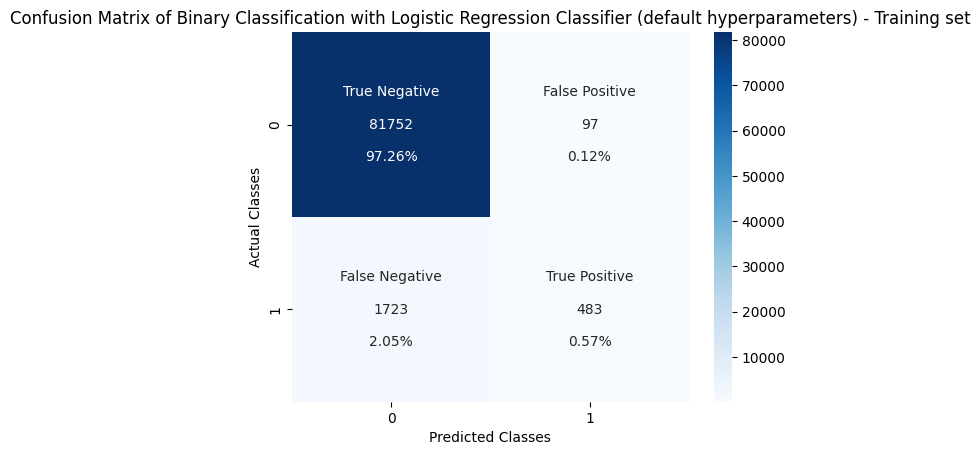

In [674]:
# Evaluating the confusion matrix score for training set. 
train_confusion_matrix = confusion_matrix(y_train, y_train_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in train_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in train_confusion_matrix.flatten()/np.sum(train_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(train_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Binary Classification with Logistic Regression Classifier (default hyperparameters) - Training set')

# Displaying the confusion matrix plot.
plt.show()

In [675]:
# Checking the performance metrics for the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Precision Score:', precision_score(y_train, y_train_predicts))
print('Recall Score:', recall_score(y_train, y_train_predicts))
print('F1 Score:', f1_score(y_train, y_train_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train, y_train_predicts, average='binary'))


Performance Score of the Training Set:
Precision Score: 0.8327586206896552
Recall Score: 0.21894832275611967
F1 Score: 0.9721354414854421
binary F1 Score: 0.34673366834170855


#### Insight: 

* The F1 score of the training set is slightly greater than the baseline performance score. Therefore, further assessing the model's performance on the validation set to determine whether it's overfitting or underfitting.

• Checking the performance metrics for the validation set.

In [676]:
# Utilising the trained logistic regression model, predicting the target variable
# And storing the results in 'y_validation_predicts' variable.
y_validation_predicts = logistic_regression.predict(X_validation)

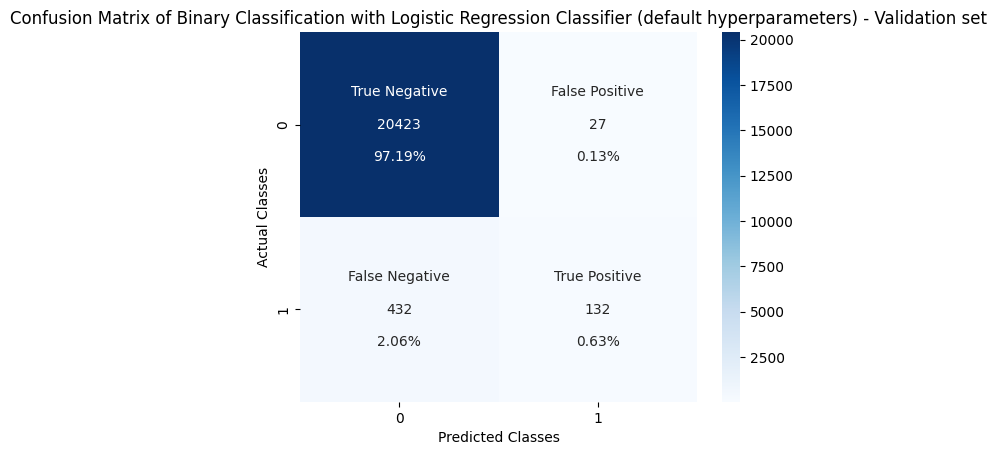

In [677]:
# Evaluating the confusion matrix score for validation set. 
validation_confusion_matrix = confusion_matrix(y_validation, y_validation_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in validation_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in validation_confusion_matrix.flatten()/np.sum(validation_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(validation_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Binary Classification with Logistic Regression Classifier (default hyperparameters) - Validation set')

# Displaying the confusion matrix plot.
plt.show()

In [678]:
# Checking the performance metrics for the training set.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('Precision Score:', precision_score(y_validation, y_validation_predicts))
print('Recall Score:', recall_score(y_validation, y_validation_predicts))
print('F1 Score:', f1_score(y_validation, y_validation_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validation, y_validation_predicts, average='binary'))


Performance Score of the Validation Set:
Precision Score: 0.8301886792452831
Recall Score: 0.23404255319148937
F1 Score: 0.9721467679203298
binary F1 Score: 0.36514522821576767


In [679]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating the performance metrics for the training set and storing it in respective variables.        
train_precision = precision_score(y_train, y_train_predicts)       
train_recall = recall_score(y_train, y_train_predicts)
train_f1score = f1_score(y_train, y_train_predicts, average='weighted')
train_binaryf1 = f1_score(y_train, y_train_predicts, average='binary')

# Evaluating the performance metrics for validation set and storing it in respective variables.     
validate_precision = precision_score(y_validation, y_validation_predicts)         
validate_recall = recall_score(y_validation, y_validation_predicts)
validate_f1score = f1_score(y_validation, y_validation_predicts, average='weighted')
validate_binaryf1 = f1_score(y_validation, y_validation_predicts, average='binary')

In [680]:
# Building dataframe to hold all the performance scores for the logistic regressor classifier model for 3 sets to review and compare it together.
df_logisticreg_perf = pd.DataFrame({"DataSet": 'Training', "Precision": train_precision, "Recall": train_recall, "F1 Score": train_f1score, "binary F1 Score": train_binaryf1},index=['DataSet'])
validation = {"DataSet": 'Validation', "Precision": validate_precision, "Recall": validate_recall, "F1 Score": validate_f1score, "binary F1 Score": validate_binaryf1}
df_logisticreg_perf = df_logisticreg_perf.append(validation, ignore_index=True)

# Including the name of the algorithm in its performance metrics.
df_logisticreg_perf = df_logisticreg_perf.style.set_caption('Logistic Regression Classifier with default hyperparameters.')

# Reviewing the performance metrics score for all the sets.
df_logisticreg_perf

,DataSet,Precision,Recall,F1 Score,binary F1 Score
0,Training,0.832759,0.218948,0.972135,0.346734
1,Validation,0.830189,0.234043,0.972147,0.365145


#### Insight: 

* From the above, the weighted F1 score and Precision score of both the training and validation sets, the logistic regression classifier with default hyperparameters appears to be performing well overall. However, the Recall score of 0.2189 for training and 0.2340 for validation, indicates that the model may miss some potential customers who are likely to purchase a new vehicle.

* Additionally, from the confusion matrix, the False Negative error for both the sets training with 1723 and validation with 432, informs that a considerable number of customers who is likely to buy a new vehicle are being predicted otherwise by the model. This misclassification could result in missing out on these potential customers during the marketing campaign.

* Therefore, to address the issue of false negative errors, applying regularization techniques and evaluating the model's performance to check if it can help minimize the misclassification of potential customers.

#### Rationale: 

<u> Hyperparameters </u>
* To start with assigning hyperparameters with penalty='elasticnet', l1_ratio=0.5, class_weight='balanced' and solver='saga' to the Logistics Regression algorithm and assessing the performance and then, modifying the hyperparameter values as necessary based on this assessment.

* Utilising class_weight='balanced' hyperparameter to adjust the weights of the classes based on their proportion in the training set, which can help to address the issue of high imbalance classes and improve model performance.

* While the solver='saga' hyperparameter is used to specify the algorithm used to optimize the model (also useful for large datasets or datasets with a high number of features).

* Therefore, using class_weight='balanced' and solver='saga' can help to address issues related to class imbalance and model optimization, respectively, which can ultimately lead to better performance of the model.

Note: Specifying l1_ratio=0, is same as utilizing penalty='l2', and l1_ratio=1, is equivalent to utilizing penalty='l1'.

#### 8] Training Logistic Regression Classifier - Exercise 2

• Building a model and predicitng the target classes for training and validation set.

In [681]:
# Creating 'logistic_regression1' instance by the instantiating LogisticRegression class from sklearn.
# For regularisation, using hyperparameters penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga' for this model. 
logistic_regression1 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga')

# Training the logistic regression model with the features from the training data.
logistic_regression1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0.5, penalty='elasticnet',
                   solver='saga')

In [682]:
# Utilising the above trained logistic regression model on validation set.
# Predicting the target classes and storing the results in 'y_train_predicts' variable.
y_train_predicts = logistic_regression1.predict(X_train)

# Utilising the trained logistic regression model on validation set.
# Predicting the target variable and storing the results in 'y_validation_predicts' variable.
y_validation_predicts = logistic_regression1.predict(X_validation)

• Checking the performance metrics for the training and validation sets.

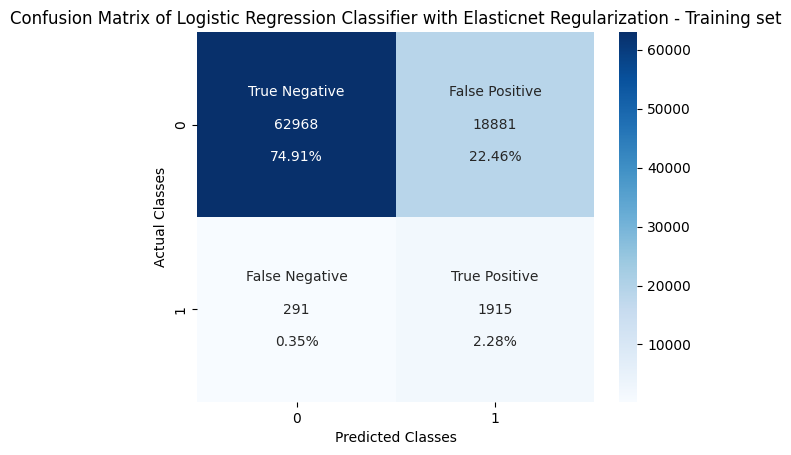

In [683]:
# Evaluating the confusion matrix score for training set. 
train_confusion_matrix = confusion_matrix(y_train, y_train_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in train_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in train_confusion_matrix.flatten()/np.sum(train_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(train_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with Elasticnet Regularization - Training set')

# Displaying the confusion matrix plot.
plt.show()

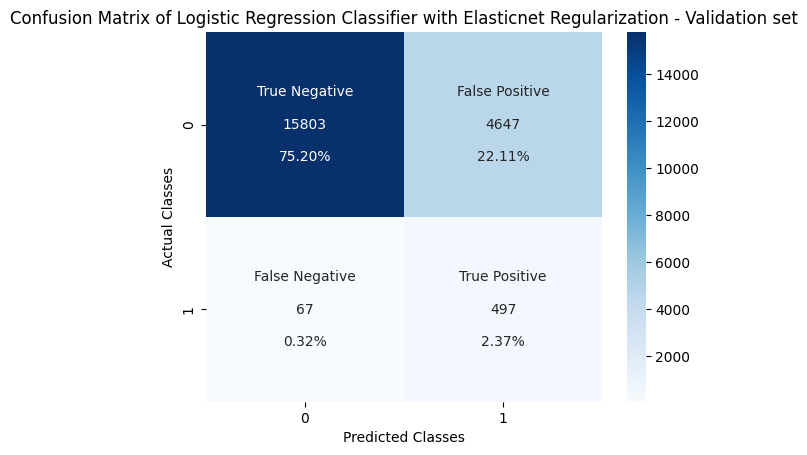

In [684]:
# Evaluating the confusion matrix score for validation set. 
validation_confusion_matrix = confusion_matrix(y_validation, y_validation_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in validation_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in validation_confusion_matrix.flatten()/np.sum(validation_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(validation_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with Elasticnet Regularization - Validation set')

# Displaying the confusion matrix plot.
plt.show()

In [685]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating the performance metrics for the training set and storing it in respective variables.        
train_precision = precision_score(y_train, y_train_predicts)       
train_recall = recall_score(y_train, y_train_predicts)
train_f1score = f1_score(y_train, y_train_predicts, average='weighted')
train_binaryf1 = f1_score(y_train, y_train_predicts, average='binary')

# Evaluating the performance metrics for validation set and storing it in respective variables.     
validate_precision = precision_score(y_validation, y_validation_predicts)         
validate_recall = recall_score(y_validation, y_validation_predicts)
validate_f1score = f1_score(y_validation, y_validation_predicts, average='weighted')
validate_binaryf1 = f1_score(y_validation, y_validation_predicts, average='binary')

In [686]:
# Building dataframe to hold all the performance scores for the logistic regressor classifier model for 3 sets to review and compare it together.
df_logisticreg_perf1 = pd.DataFrame({"DataSet": 'Training', "Precision": train_precision, "Recall": train_recall, "F1 Score": train_f1score, "binary F1 Score": train_binaryf1},index=['DataSet'])
validation = {"DataSet": 'Validation', "Precision": validate_precision, "Recall": validate_recall, "F1 Score": validate_f1score, "binary F1 Score": validate_binaryf1}
df_logisticreg_perf1 = df_logisticreg_perf1.append(validation, ignore_index=True)

# Including the name of the algorithm in its performance metrics.
df_logisticreg_perf1 = df_logisticreg_perf1.style.set_caption('Logistic Regression Classifier with Elasticnet Regularization.')

# Reviewing the performance metrics score for all the sets.
df_logisticreg_perf1

,DataSet,Precision,Recall,F1 Score,binary F1 Score
0,Training,0.092085,0.868087,0.849470,0.166507
1,Validation,0.096617,0.881206,0.851527,0.174142


#### Insight: 

* The logistic regression classifier with 'elasticnet' regularisation/penalty (and other hyperparameters class_weight='balanced' and solver='saga') with Recall score of 
0.8680 for training and 0.8812 for validation informs that the model is good at identifying customers who are likely to purchase a new car but may be missing out on many of them.

* However, the binary F1 score has degraded for both the training with 0.1665 and validation with 0.1741, indicating that the model is not performing well in correctly classifying the positive class instances. 

* Additionally, the False Negative error has significantly dropped to 291 for training and 67 for the validation set, thereby increasing the Recall score but compromising the Precision score on both sets.

<u> Hyperparameters </u>
* Moreover, the binary F1 score of classes with positive labels has dropped considerably. So, conducting additional analysis to examine the impact of l2 regularization on the model's performance.

#### 8] Training Logistic Regression Classifier - Exercise 3

• Building a model and predicitng the target classes for training and validation set.

In [687]:
# Creating 'logistic_regression2' instance by the instantiating LogisticRegression class from sklearn.
# For regularisation, using hyperparameters penalty='elasticnet', l1_ratio=0 means l2, class_weight='balanced', solver='saga' for this model. 
logistic_regression2 = LogisticRegression(penalty='elasticnet', l1_ratio=0, class_weight='balanced', solver='saga')

# Training the logistic regression model with the features from the training data.
logistic_regression2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0, penalty='elasticnet',
                   solver='saga')

In [688]:
# Utilising the above trained logistic regression model on validation set.
# Predicting the target classes and storing the results in 'y_train_predicts' variable.
y_train_predicts = logistic_regression2.predict(X_train)

# Utilising the trained logistic regression model on validation set.
# Predicting the target variable and storing the results in 'y_validation_predicts' variable.
y_validation_predicts = logistic_regression2.predict(X_validation)

• Checking the performance metrics for the training and validation sets.

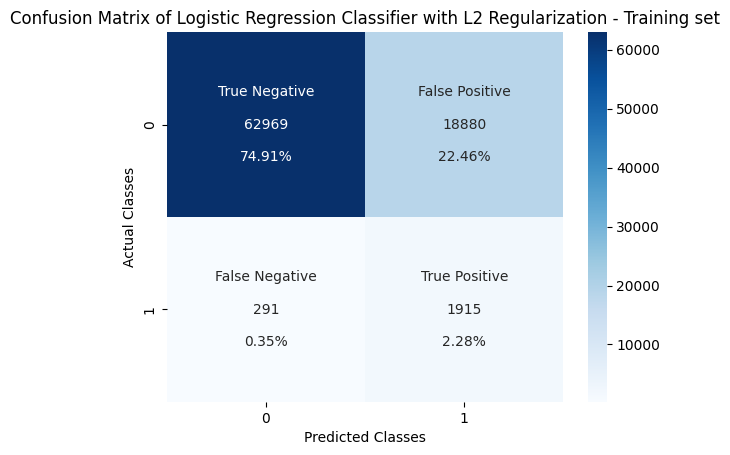

In [689]:
# Evaluating the confusion matrix score for training set. 
train_confusion_matrix = confusion_matrix(y_train, y_train_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in train_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in train_confusion_matrix.flatten()/np.sum(train_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(train_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with L2 Regularization - Training set')

# Displaying the confusion matrix plot.
plt.show()

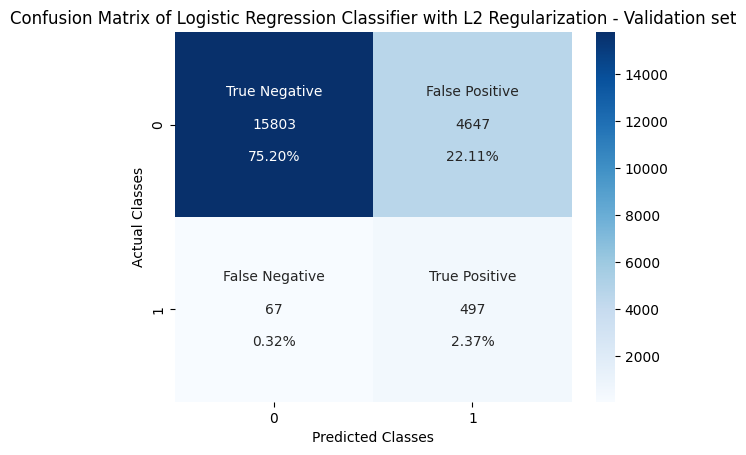

In [690]:
# Evaluating the confusion matrix score for validation set. 
validation_confusion_matrix = confusion_matrix(y_validation, y_validation_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in validation_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in validation_confusion_matrix.flatten()/np.sum(validation_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(validation_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with L2 Regularization - Validation set')

# Displaying the confusion matrix plot.
plt.show()

In [691]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating the performance metrics for the training set and storing it in respective variables.        
train_precision = precision_score(y_train, y_train_predicts)       
train_recall = recall_score(y_train, y_train_predicts)
train_f1score = f1_score(y_train, y_train_predicts, average='weighted')
train_binaryf1 = f1_score(y_train, y_train_predicts, average='binary')

# Evaluating the performance metrics for validation set and storing it in respective variables.     
validate_precision = precision_score(y_validation, y_validation_predicts)         
validate_recall = recall_score(y_validation, y_validation_predicts)
validate_f1score = f1_score(y_validation, y_validation_predicts, average='weighted')
validate_binaryf1 = f1_score(y_validation, y_validation_predicts, average='binary')

In [692]:
# Building dataframe to hold all the performance scores for the logistic regressor classifier model for 3 sets to review and compare it together.
df_logisticreg_perf2 = pd.DataFrame({"DataSet": 'Training', "Precision": train_precision, "Recall": train_recall, "F1 Score": train_f1score, "binary F1 Score": train_binaryf1},index=['DataSet'])
validation = {"DataSet": 'Validation', "Precision": validate_precision, "Recall": validate_recall, "F1 Score": validate_f1score, "binary F1 Score": validate_binaryf1}
df_logisticreg_perf2 = df_logisticreg_perf2.append(validation, ignore_index=True)

# Including the name of the algorithm in its performance metrics.
df_logisticreg_perf2 = df_logisticreg_perf2.style.set_caption('Logistic Regression Classifier with L2 Regularization.')

# Reviewing the performance metrics score for all the sets.
df_logisticreg_perf2

,DataSet,Precision,Recall,F1 Score,binary F1 Score
0,Training,0.092089,0.868087,0.849478,0.166514
1,Validation,0.096617,0.881206,0.851527,0.174142


* By utilizing regularization and implementing an 'l2' penalty along with other hyperparameters such as class_weight='balanced' and solver='saga', the performance is identical to the previous model with elasticnet penalty.

* Even the False Negative error remain same with 291 for training and 67 for the validation set. Thus, further assessing how the model performs with l1 regularization.

#### 8] Training Logistic Regression Classifier - Exercise4

• Building a model and predicitng the target classes for training and validation set.

In [693]:
# Creating 'logistic_regression3' instance by the instantiating LogisticRegression class from sklearn.
# For regularisation, using hyperparameters penalty='elasticnet', l1_ratio=1 means l1, class_weight='balanced', solver='saga' for this model. 
logistic_regression3 = LogisticRegression(penalty='elasticnet', l1_ratio=1, class_weight='balanced', solver='saga')

# Training the logistic regression model with the features from the training data.
logistic_regression3.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=1, penalty='elasticnet',
                   solver='saga')

In [694]:
# Utilising the above trained logistic regression model on validation set.
# Predicting the target classes and storing the results in 'y_train_predicts' variable.
y_train_predicts = logistic_regression3.predict(X_train)

# Utilising the trained logistic regression model on validation set.
# Predicting the target variable and storing the results in 'y_validation_predicts' variable.
y_validation_predicts = logistic_regression3.predict(X_validation)

• Checking the performance metrics for the training and validation sets.

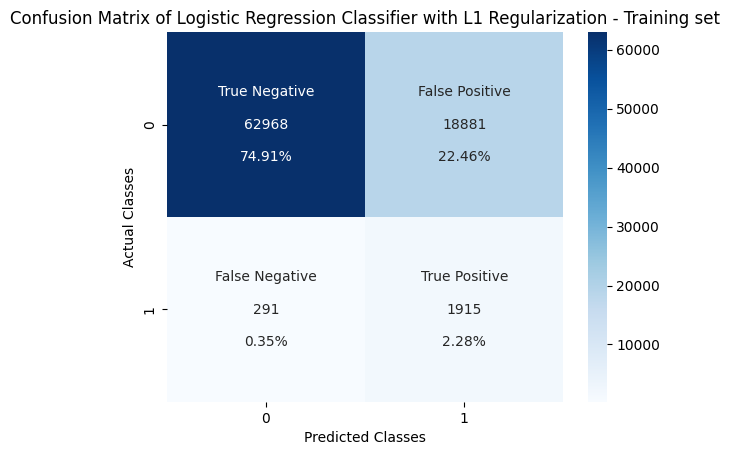

In [695]:
# Evaluating the confusion matrix score for training set. 
train_confusion_matrix = confusion_matrix(y_train, y_train_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in train_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in train_confusion_matrix.flatten()/np.sum(train_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(train_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with L1 Regularization - Training set')

# Displaying the confusion matrix plot.
plt.show()

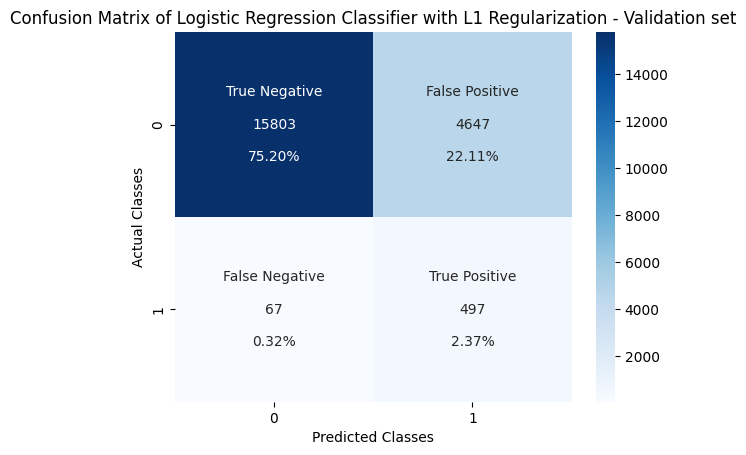

In [696]:
# Evaluating the confusion matrix score for validation set. 
validation_confusion_matrix = confusion_matrix(y_validation, y_validation_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in validation_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in validation_confusion_matrix.flatten()/np.sum(validation_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(validation_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with L1 Regularization - Validation set')

# Displaying the confusion matrix plot.
plt.show()

In [697]:
# Creating a dataframe to hold all the performance scores to review and compare it together.
# Evaluating the performance metrics for the training set and storing it in respective variables.        
train_precision = precision_score(y_train, y_train_predicts)       
train_recall = recall_score(y_train, y_train_predicts)
train_f1score = f1_score(y_train, y_train_predicts, average='weighted')
train_binaryf1 = f1_score(y_train, y_train_predicts, average='binary')

# Evaluating the performance metrics for validation set and storing it in respective variables.     
validate_precision = precision_score(y_validation, y_validation_predicts)         
validate_recall = recall_score(y_validation, y_validation_predicts)
validate_f1score = f1_score(y_validation, y_validation_predicts, average='weighted')
validate_binaryf1 = f1_score(y_validation, y_validation_predicts, average='binary')

In [698]:
# Building dataframe to hold all the performance scores for the logistic regressor classifier model for 3 sets to review and compare it together.
df_logisticreg_perf3 = pd.DataFrame({"DataSet": 'Training', "Precision": train_precision, "Recall": train_recall, "F1 Score": train_f1score, "binary F1 Score": train_binaryf1},index=['DataSet'])
validation = {"DataSet": 'Validation', "Precision": validate_precision, "Recall": validate_recall, "F1 Score": validate_f1score, "binary F1 Score": validate_binaryf1}
df_logisticreg_perf3 = df_logisticreg_perf3.append(validation, ignore_index=True)

# Reviewing the performance metrics score for all the sets.
df_logisticreg_perf3

,DataSet,Precision,Recall,F1 Score,binary F1 Score
0,Training,0.092085,0.868087,0.849470,0.166507
1,Validation,0.096617,0.881206,0.851527,0.174142


#### Insight:

* The performance metrics for Precision, Recall, weighted and binary F1 Scores are the same across all three regularization methods l1, l2, and elasticnet.

* Regularization has led to a significant reduction in False Negative errors with 291 for training and 67 for validation set, resulting in an increase in the Recall score for both datasets. 

* However, binary F1 Score has significantly dropped indicating that the model is not performing well in identifying customers who are likely to purchase a new vehicle.

### • Model Evaluation

#### 9] Accessing Model Performance

• Assessing the performance of the model on the testing set.

In [699]:
# Evaluating logistic regression model performance on testing set and storing result in y_test_predicts. 
y_test_predicts = logistic_regression3.predict(X_test)

• Generating dataframe of performance metrics for all sets and assessing the scores.

In [700]:
# Evaluating the performance metrics for testing set and storing it in respective variables.
test_precision = precision_score(y_test, y_test_predicts) 
test_recall = recall_score(y_test, y_test_predicts)
test_f1score = f1_score(y_test, y_test_predicts, average='weighted')
test_binaryf1 = f1_score(y_test, y_test_predicts, average='binary')

# Appending the dataframe to hold all the performance scores for the logistic regressor classifier model of the testing set to review and compare it together.
testing = {"DataSet": 'Testing', "Precision": test_precision, "Recall": test_recall, "F1 Score": test_f1score, "binary F1 Score": test_binaryf1}
df_logisticreg_perf3 = df_logisticreg_perf3.append(testing, ignore_index=True)

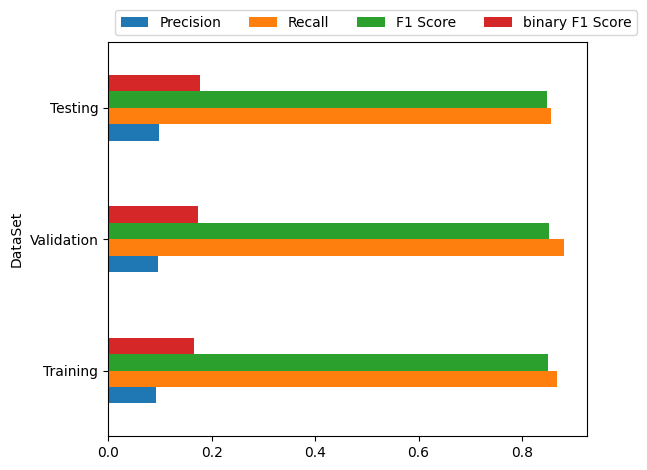

In [701]:
# Displaying the bar graph of performance metrics for all sets.
barplot = df_logisticreg_perf3.set_index('DataSet').plot(kind='barh')
barplot.legend(
    ncol=len(df_logisticreg_perf3.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10})

# Displaying the bar graph.
plt.tight_layout()

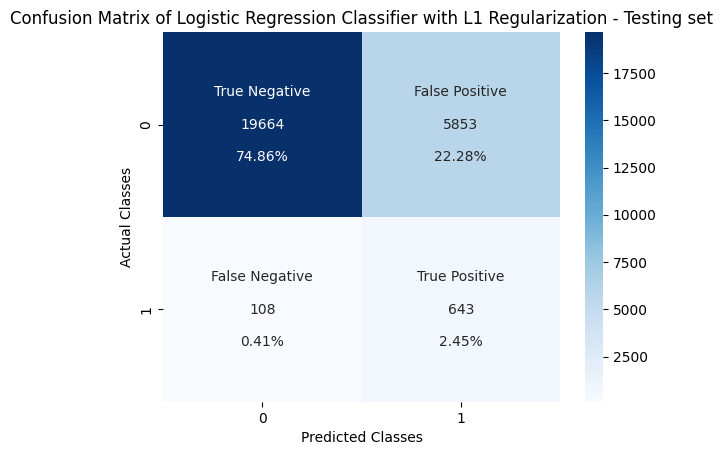

In [702]:
# Evaluating the confusion matrix score for the testing set. 
test_confusion_matrix = confusion_matrix(y_test, y_test_predicts)

# Creating the set of axes to customize.
ax = plt.axes()

# Defining the names and frequencies rates of every class within the target variable.
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
class_counts = ["{0:0.0f}".format(value) for value in test_confusion_matrix.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in test_confusion_matrix.flatten()/np.sum(test_confusion_matrix)]

# Labeling the confusion matrix plot.
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(class_names, class_counts, class_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creating heatmap of a confusion matrix using the seaborn library.
tarin_conf_matrix = sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# setting the x-axis, y-axis labels and title to the heatmap plot created above.
tarin_conf_matrix.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.set_title('Confusion Matrix of Logistic Regression Classifier with L1 Regularization - Testing set')

# Displaying the confusion matrix plot.
plt.show()

In [703]:
# Including the name of the algorithm in its performance metrics.
df_logisticreg_perf3 = df_logisticreg_perf3.style.set_caption('Logistic Regression Classifier with L1 Regularization.')

# Reviewing the performance metrics score for all the sets. 
df_logisticreg_perf3

,DataSet,Precision,Recall,F1 Score,binary F1 Score
0,Training,0.092085,0.868087,0.849470,0.166507
1,Validation,0.096617,0.881206,0.851527,0.174142
2,Testing,0.098984,0.856192,0.848625,0.177453


#### Summary Insight & Deployment Suggestion: 
* The logistic regression algorithm with default hyperparameters had the Recall score of 0.2189 for training and 0.2340 for validation, indicating that the model may miss some potential customers who are likely to purchase a new vehicle.

* Applying regularization techniques such as l1, l2 and elasticnet, has led to a significant reduction in False Negative errors representing some customers who are likely to purchase new vehicle are being overlooked, with 291 for training, 67 for validation and 108 for testing set, as opposed to the initial model which had 1723 for training and 432 for validation sets.

* However, the regularization has significantly dropped binary F1 Score, indicating that the model is not performing well in identifying customers who are likely to purchase a new vehicle which could lead to the loss of chances to make sales and earn revenue, and may also result in failure to achieve marketing campaign goals or objectives.

* Therefore, both the logistic regression models, one with default hyperparameters and the other with regularization techniques, are not sufficiently generalized and show relatively inadequate overall performance. So, it would be beneficial to explore other binary classification algorithms that can better identify potential customers who are likely to purchase a new vehicle. Therefore, it is not recommended to deploy either of these models in a production environment.

* In next experiment, investigating other classification algorithms, namely Decision Tree, to conduct experiment and evaluate performance for selection of the most appropriate model for identifying potential customers who are willing to purchase a new vehicle, for the marketing campaign.